In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

In [2]:
#Load data into the dataframe
rawdf = pd.read_csv("Resources/cardata.csv")
rawdf.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
'''
Ideas for Exploratory Data Analysis (EDA)
- Look at Datatypes
- .describe()
- Look at Columns, decide if there are any worth removing
- Rename columns
- Remove duplicates
- Drop Null values
- Identify and remove outliers

Graph ideas
- Histogram of make, model, year, Cylinders, transmission
- (Avg hwy mpg, city mpg, popularity) by (Make, Model, Year)
- Correlation matrix ('heat map')
  - Scatterplot of any two metrics that have a correlation higher than +/- .6
- 3D graph of some data
'''


"\nIdeas for Exploratory Data Analysis (EDA)\n- Look at Datatypes\n- .describe()\n- Look at Columns, decide if there are any worth removing\n- Rename columns\n- Remove duplicates\n- Drop Null values\n- Identify and remove outliers\n\nGraph ideas\n- Histogram of make, model, year, Cylinders, transmission\n- (Avg hwy mpg, city mpg, popularity) by (Make, Model, Year)\n- Correlation matrix ('heat map')\n  - Scatterplot of any two metrics that have a correlation higher than +/- .6\n- 3D graph of some data\n"

In [4]:
#Looks at the datatypes in each column of the dataframe
rawdf.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [5]:
# Does a statistical analysis of all columns with numeric datatypes 
rawdf.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
#Makes a list of all the columns and stores in an object
allcolumns = list(rawdf.columns)
allcolumns

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [7]:
# Select the columns that we want in our cleaned dataframe
finalcolumns = [
    # 'Make',
    # 'Model',
    'Year',
    # 'Engine Fuel Type',
    'Engine HP',
    'Engine Cylinders',
    # 'Transmission Type',
    # 'Driven_Wheels',
    'Number of Doors',
    # 'Market Category',
    # 'Vehicle Size',
    # 'Vehicle Style',
    'highway MPG',
    'city mpg',
    'Popularity',
    'MSRP'
]
finalcolumns

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [8]:
# Create New DataFrame with just the selected columns
numdf = rawdf[finalcolumns]
numdf.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [9]:
# Checks the number of rows and columns respectively
numdf.shape

(11914, 8)

In [10]:
# Counts the number of non-Null values in each column
numdf.count()

Year                11914
Engine HP           11845
Engine Cylinders    11884
Number of Doors     11908
highway MPG         11914
city mpg            11914
Popularity          11914
MSRP                11914
dtype: int64

In [11]:
# Removing all rows that have duplicate values and viewing the top 5 rows
numdf=numdf.drop_duplicates()
numdf.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [12]:
# Counts the number of non-Null values in each column
numdf.count()

Year                10978
Engine HP           10909
Engine Cylinders    10948
Number of Doors     10972
highway MPG         10978
city mpg            10978
Popularity          10978
MSRP                10978
dtype: int64

In [13]:
# Counts the number of Null values in each row. The inverse of the above cell
numdf.isnull().sum()

Year                 0
Engine HP           69
Engine Cylinders    30
Number of Doors      6
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [14]:
# Drops all rows containing null values from the dataframe
numdf= numdf.dropna()
numdf.count()

Year                10879
Engine HP           10879
Engine Cylinders    10879
Number of Doors     10879
highway MPG         10879
city mpg            10879
Popularity          10879
MSRP                10879
dtype: int64

In [15]:
# Counts the number of Null values in each column. Showing that the .dropna() worked
numdf.isnull().sum()

Year                0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

In [16]:
Q1 = numdf.quantile(0.25)
Q3 = numdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                    9.0
Engine HP             130.0
Engine Cylinders        2.0
Number of Doors         2.0
highway MPG             8.0
city mpg                6.0
Popularity           1460.0
MSRP                21405.0
dtype: float64


In [17]:
df = numdf[~((numdf < (Q1 - 1.5 * IQR)) |(numdf > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape


(8467, 8)

In [18]:
df.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [19]:
# # Isolating the numeric columns to perfrom the IQR to identify outliers
# df = numdf.describe()
# numcolumns = df.columns
# cardf = numdf[numcolumns]
# cardf

In [20]:
# Total amount of different Model
len(rawdf['Model'].unique())


915

In [21]:
# Total amount of different Makes
len(rawdf['Make'].unique())

48

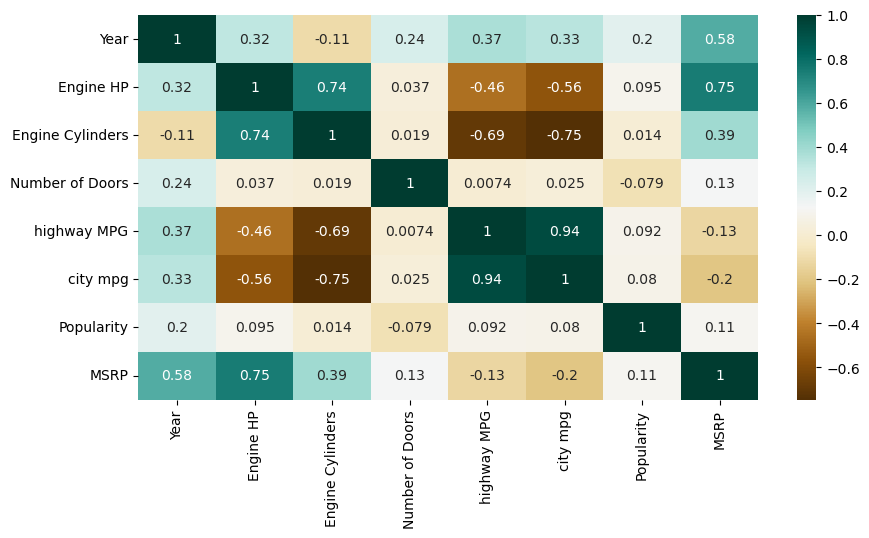

In [22]:
# Creates a correlation matrix of the different values
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c
plt.show()

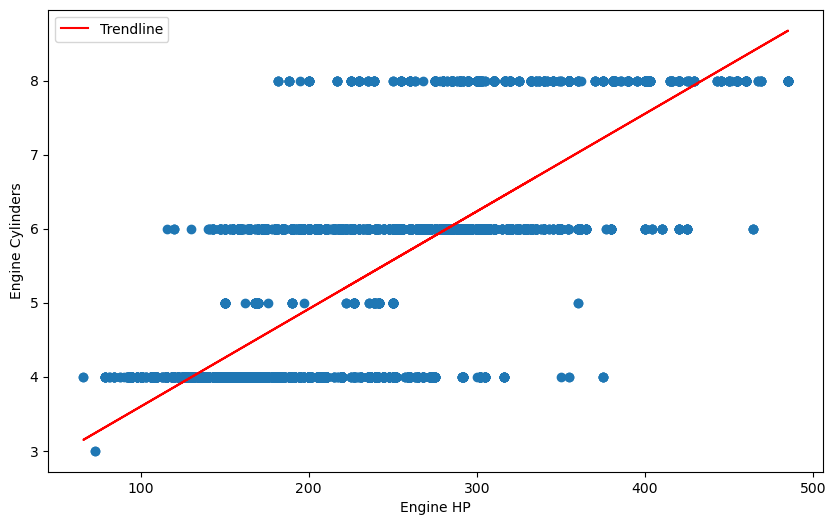

In [31]:
fig2, ax = plt.subplots(figsize=(10,6))
x='Engine HP'
y='Engine Cylinders'

ax.scatter(df[x], df[y])

coef = np.polyfit(df[x], df[y],1)
trendline = np.poly1d(coef)

plt.plot(df[x], trendline(df[x]), label= "Trendline", color ='red')

ax.set_xlabel(x)
ax.set_ylabel(y)


plt.legend()
plt.show()


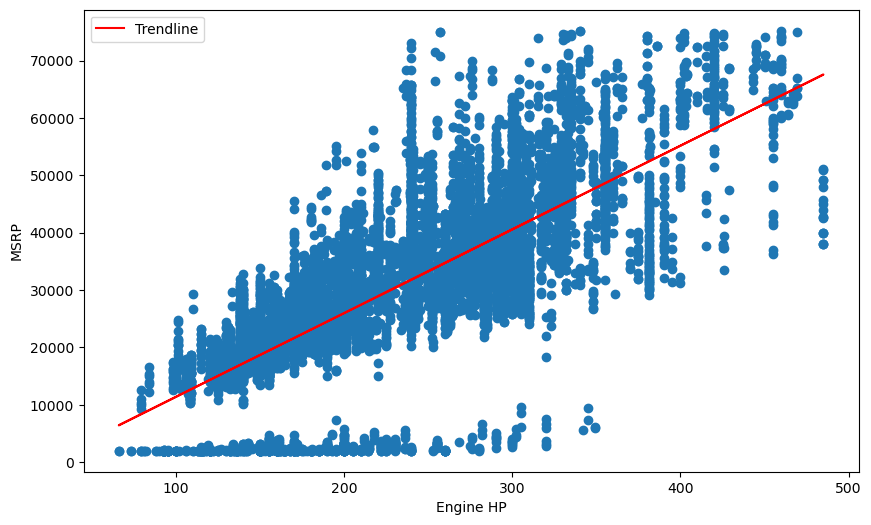

In [33]:
fig3, ax = plt.subplots(figsize=(10,6))
x='Engine HP'
y='MSRP'

ax.scatter(df[x], df[y])

coef = np.polyfit(df[x], df[y],1)
trendline = np.poly1d(coef)

plt.plot(df[x], trendline(df[x]), label= "Trendline", color ='red')

ax.set_xlabel(x)
ax.set_ylabel(y)


plt.legend()
plt.show()


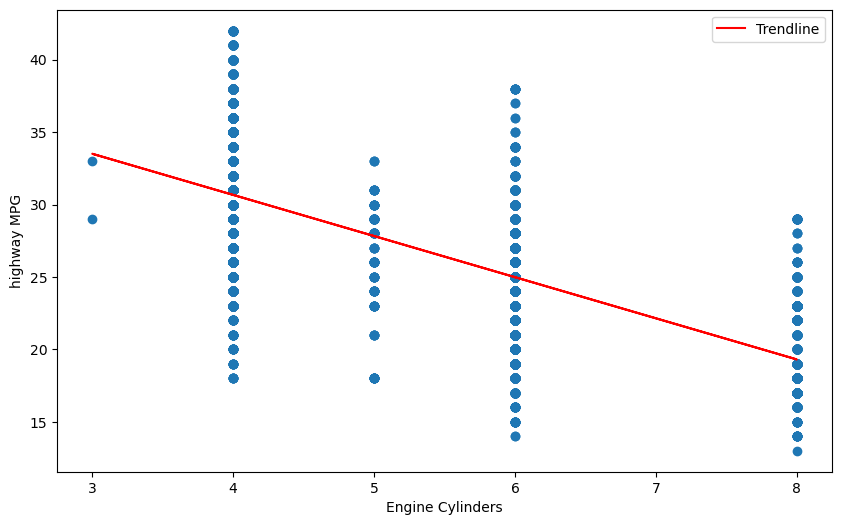

In [34]:
fig4, ax = plt.subplots(figsize=(10,6))
x='Engine Cylinders'
y='highway MPG'

ax.scatter(df[x], df[y])

coef = np.polyfit(df[x], df[y],1)
trendline = np.poly1d(coef)

plt.plot(df[x], trendline(df[x]), label= "Trendline", color ='red')

ax.set_xlabel(x)
ax.set_ylabel(y)


plt.legend()
plt.show()


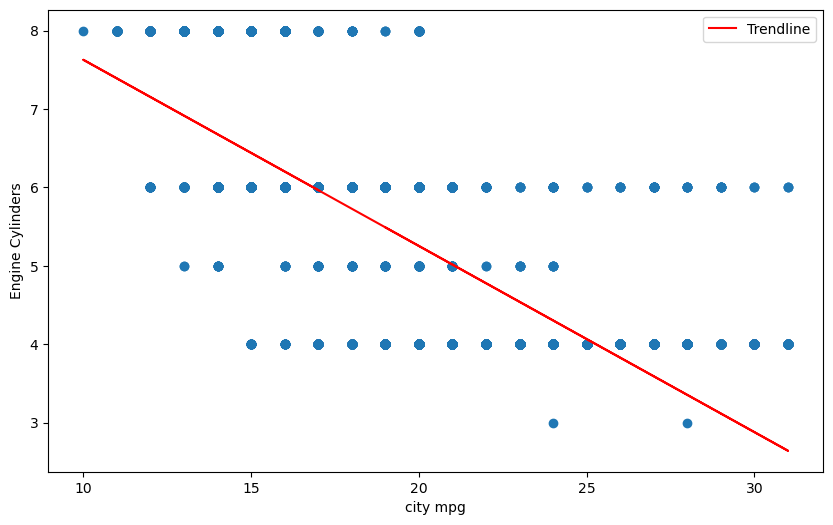

In [35]:
fig5, ax = plt.subplots(figsize=(10,6))
x='city mpg'
y='Engine Cylinders'

ax.scatter(df[x], df[y])

coef = np.polyfit(df[x], df[y],1)
trendline = np.poly1d(coef)

plt.plot(df[x], trendline(df[x]), label= "Trendline", color ='red')

ax.set_xlabel(x)
ax.set_ylabel(y)


plt.legend()
plt.show()


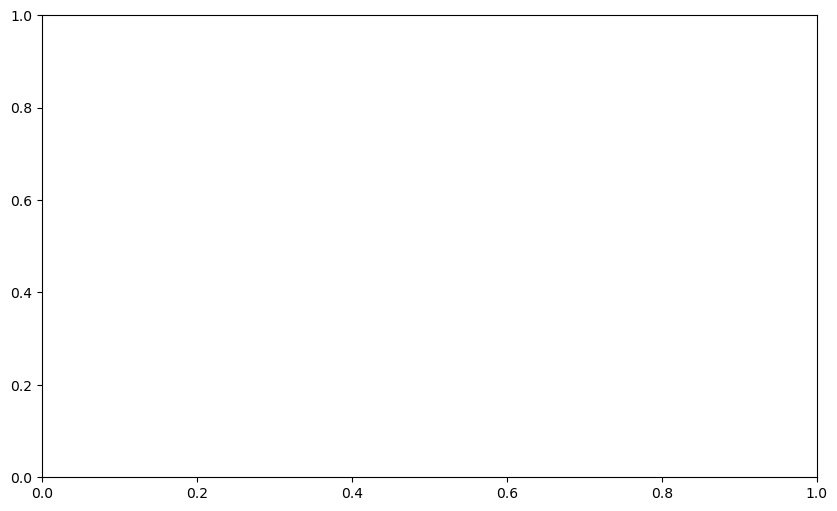

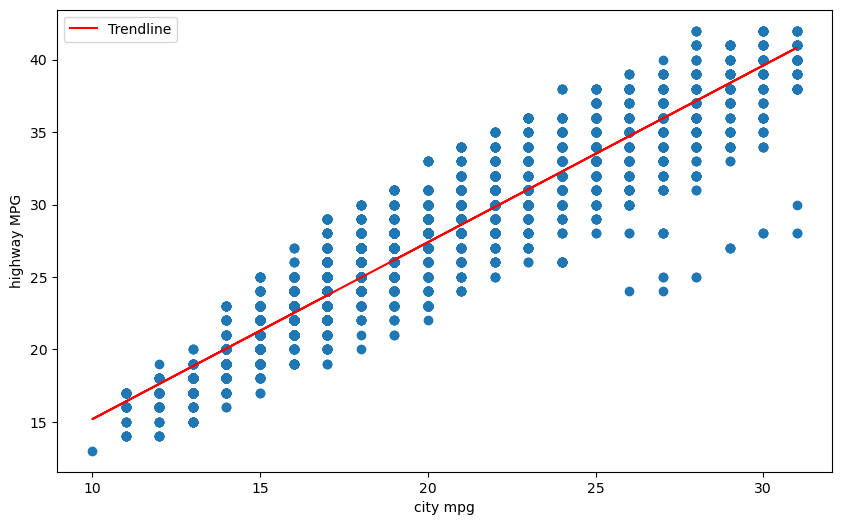

In [37]:
fig6, ax = plt.subplots(figsize=(10,6))
x='city mpg'
y='highway MPG'
ax.scatter(df[x], df[y])

coef = np.polyfit(df[x], df[y],1)
trendline = np.poly1d(coef)

plt.plot(df[x], trendline(df[x]), label= "Trendline", color ='red')

ax.set_xlabel(x)
ax.set_ylabel(y)


plt.legend()
plt.show()


In [28]:
# fig7, ax = plt.subplots(figsize=(10,6))
# ax.scatter(df['Engine HP'], df['Engine Cylinders'])
# ax.set_xlabel('Engine HP')
# ax.set_ylabel('Engine Cylinders')
# plt.show()

In [29]:
# fig8, ax = plt.subplots(figsize=(10,6))
# ax.scatter(df['Engine HP'], df['Engine Cylinders'])
# ax.set_xlabel('Engine HP')
# ax.set_ylabel('Engine Cylinders')
# plt.show()